In [24]:
from sklearn import svm 
from process_images import get_labeled_data
import numpy as np
from sklearn import metrics
import itertools

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_X, train_y=  get_labeled_data('./data/train-images-idx3-ubyte.gz', './data/train-labels-idx1-ubyte.gz', verbose=True)  
test_X, test_y= get_labeled_data('./data/t10k-images-idx3-ubyte.gz', './data/t10k-labels-idx1-ubyte.gz', verbose=True)   

number of images: 60000, number of labels: 60000
rows: 28, cols: 28
processed 0 images
processed 10000 images
processed 20000 images
processed 30000 images
processed 40000 images
processed 50000 images
number of images: 10000, number of labels: 10000
rows: 28, cols: 28
processed 0 images


In [4]:
# train_X is a 3d array, each index is an image train_X[0] is the first and so on. 
# each image is 28 by 28 
print(train_X[0])
# print(test_X, test_y)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

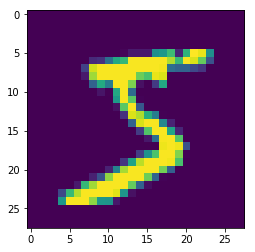

In [5]:
plt.imshow(train_X[0])
plt.show()

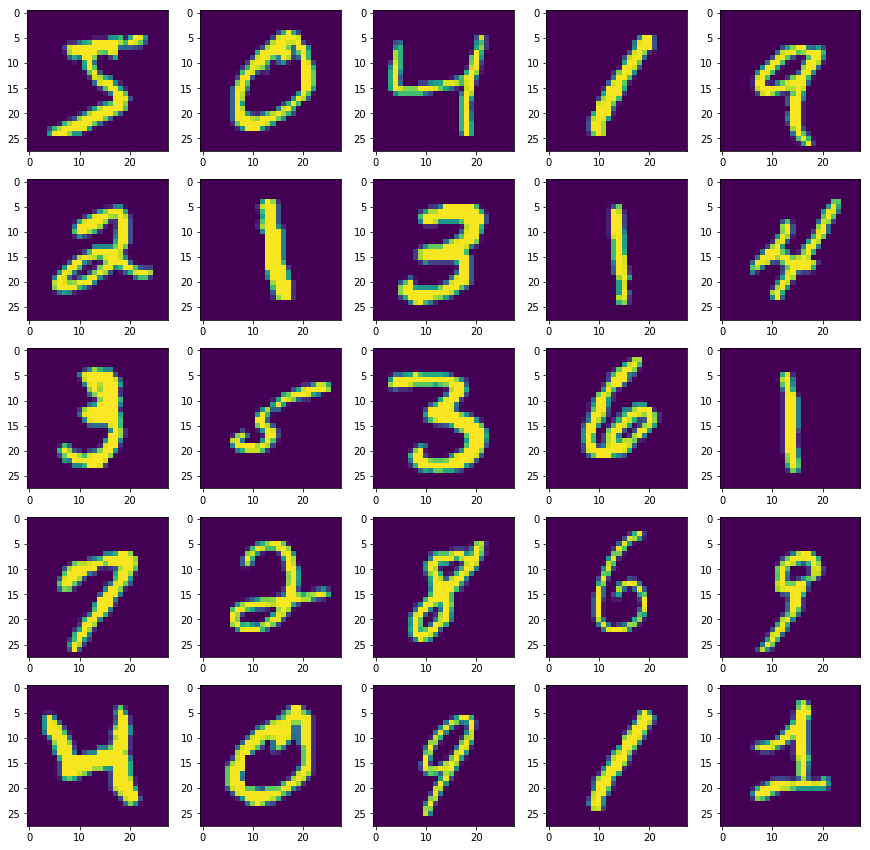

In [47]:
fig, axarr = plt.subplots(5, 5, figsize=(15, 15))
axarr[0,0] = axarr[0,0].imshow(train_X[0])
axarr[0,1] = axarr[0,1].imshow(train_X[1])
axarr[0,2] = axarr[0,2].imshow(train_X[2])
axarr[0,3] = axarr[0,3].imshow(train_X[3])
axarr[0,4] = axarr[0,4].imshow(train_X[4])

axarr[1,0] = axarr[1,0].imshow(train_X[5])
axarr[1,1] = axarr[1,1].imshow(train_X[6])
axarr[1,2] = axarr[1,2].imshow(train_X[7])
axarr[1,3] = axarr[1,3].imshow(train_X[8])
axarr[1,4] = axarr[1,4].imshow(train_X[9])

axarr[2,0] = axarr[2,0].imshow(train_X[10])
axarr[2,1] = axarr[2,1].imshow(train_X[11])
axarr[2,2] = axarr[2,2].imshow(train_X[12])
axarr[2,3] = axarr[2,3].imshow(train_X[13])
axarr[2,4] = axarr[2,4].imshow(train_X[14])

axarr[3,0] = axarr[3,0].imshow(train_X[15])
axarr[3,1] = axarr[3,1].imshow(train_X[16])
axarr[3,2] = axarr[3,2].imshow(train_X[17])
axarr[3,3] = axarr[3,3].imshow(train_X[18])
axarr[3,4] = axarr[3,4].imshow(train_X[19])

axarr[4,0] = axarr[4,0].imshow(train_X[20])
axarr[4,1] = axarr[4,1].imshow(train_X[21])
axarr[4,2] = axarr[4,2].imshow(train_X[22])
axarr[4,3] = axarr[4,3].imshow(train_X[23])
axarr[4,4] = axarr[4,4].imshow(train_X[24])
plt.show()

In [13]:
# flatten 3d array to 2d array for machine learning
# was [image][28][28] now it will be [image][28*28] because models does not care about image dimentionality 
train_X_flattened = np.zeros((len(train_X), len(train_X[0])*len(train_X[0])), dtype=np.float32) # initalize np array)
train_y_flattened = np.zeros((len(train_y)), dtype=np.uint8) # initalize np array)

for indx, X in enumerate(train_X):
    train_X_flattened[indx] = np.reshape(X, 28*28)
    
for indx, y in enumerate(train_y):
    train_y_flattened[indx] = y[0]
print(train_y_flattened)

[5 0 4 ... 5 6 8]


In [14]:
# now for testing data
test_X_flattened = np.zeros((len(test_X), len(test_X[0])*len(test_X[0])), dtype=np.float32) # initalize np array)
test_y_flattened = np.zeros((len(test_y)), dtype=np.uint8) # initalize np array)

for indx, X in enumerate(test_X):
    test_X_flattened[indx] = np.reshape(X, 28*28)
    
for indx, y in enumerate(test_y):
    test_y_flattened[indx] = y[0]

print(test_X_flattened)
print(test_y_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 1 ... 4 5 6]


# Machine Learning

In [31]:
clf = svm.SVC(gamma=0.001)
clf.fit(train_X_flattened[:20000], train_y_flattened[:20000])
print('fitted model')

fitted model


In [32]:
print(f"score: {clf.score(test_X_flattened, test_y_flattened)}")

score: 0.1135


In [33]:
y_svm_pred = clf.predict(test_X_flattened[:1000])
y_true = test_y_flattened[:1000]
svc_confusion_matrix = metrics.confusion_matrix(y_svm_pred, y_true)
print(svc_confusion_matrix)

[[  0   0   0   0   0   0   0   0   0   0]
 [ 85 126 116 107 110  87  87  99  89  94]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [34]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


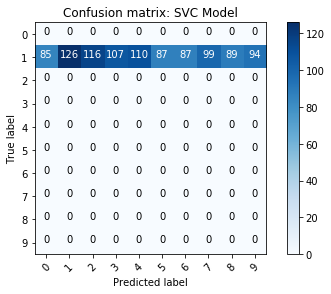

In [35]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svc_confusion_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix: SVC Model')

plt.show()